# Descriptive Analysis 

## Script Content 
#### Importing libraries and data sets
#### Descriptive analysis
#### Statistical analysis
#### Heatmaps

### Importing libraries and data set

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [7]:
# Define path 

path = r'/Users/tanu/Desktop/Data Analytics/Achievement 6/Data'

In [8]:
# Import data set

df = pd.read_csv(os.path.join(path,'Prepared data','Global_Cybersecurity_Treats.csv'))

In [9]:
df.shape

(3000, 11)

In [14]:
df.describe()

,Unnamed: 0,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1499.500000,2019.570333,50.492970,504684.136333,36.476000
std,866.169729,2.857932,28.791415,289944.084972,20.570768
min,0.000000,2015.000000,0.500000,424.000000,1.000000
25%,749.750000,2017.000000,25.757500,255805.250000,19.000000
50%,1499.500000,2020.000000,50.795000,504513.000000,37.000000
75%,2249.250000,2022.000000,75.630000,758088.500000,55.000000
max,2999.000000,2024.000000,99.990000,999635.000000,72.000000


In [16]:
df['Attack Type'].value_counts()

Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64

In [18]:
df['Target Industry'].value_counts()

Target Industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: count, dtype: int64

In [20]:
df['Attack Source'].value_counts()

Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64

In [22]:
df['Security Vulnerability Type'].value_counts()

Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64

In [24]:
# Count of attacks by industry
industry_counts = df['Target Industry'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

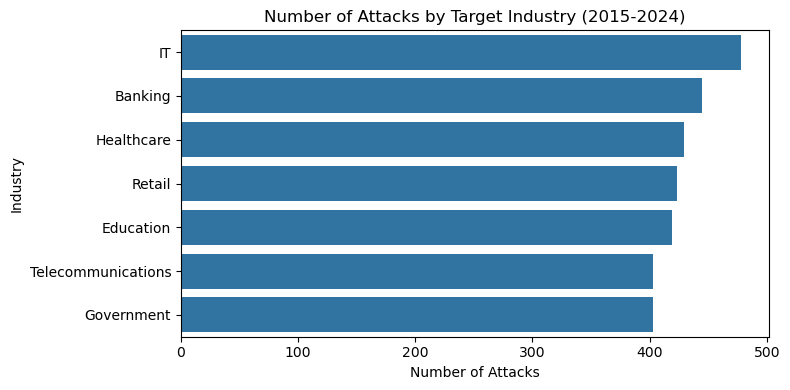

In [26]:
# Plot: Attacks by Industry

plt.figure(figsize=(8,4))
sns.barplot(x=industry_counts.values, y=industry_counts.index)
plt.title('Number of Attacks by Target Industry (2015-2024)')
plt.xlabel('Number of Attacks')
plt.ylabel('Industry')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

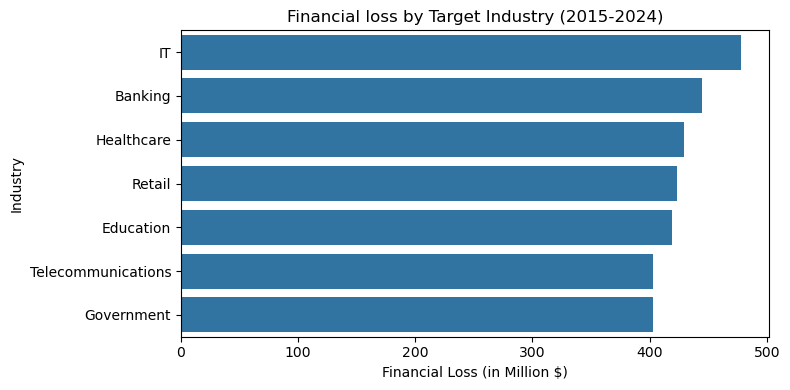

In [28]:
# Most affected industry

plt.figure(figsize=(8,4))
sns.barplot(x=industry_counts.values, y=industry_counts.index)
plt.title('Financial loss by Target Industry (2015-2024)')
plt.xlabel('Financial Loss (in Million $)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show

In [30]:
# Number of attacks per year
attacks_by_year = df['Year'].value_counts().sort_index()

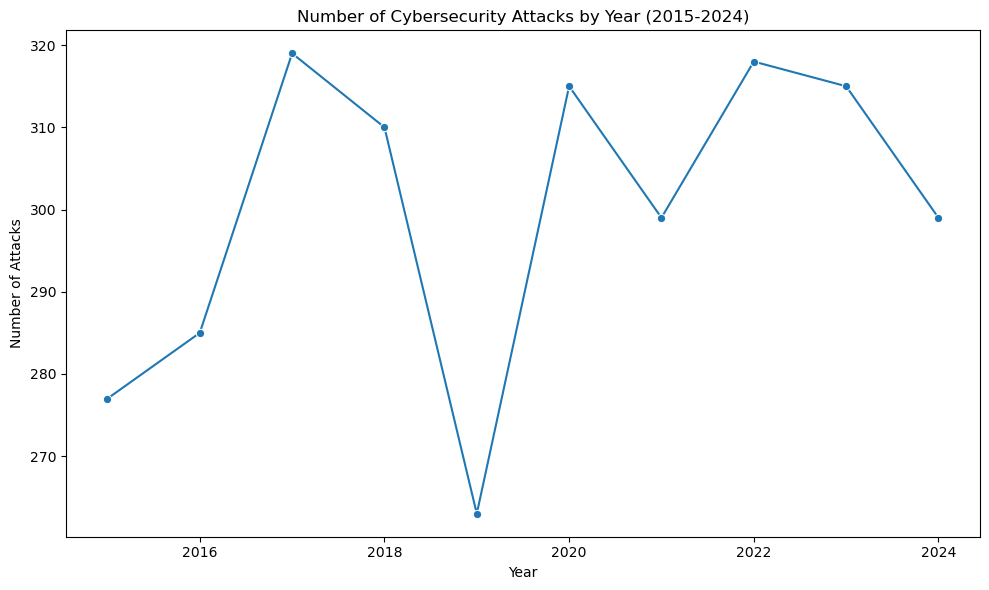

In [32]:
# Plot: Number of Attacks by Year
plt.figure(figsize=(10, 6))
sns.lineplot(x=attacks_by_year.index, y=attacks_by_year.values, marker='o')
plt.title('Number of Cybersecurity Attacks by Year (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

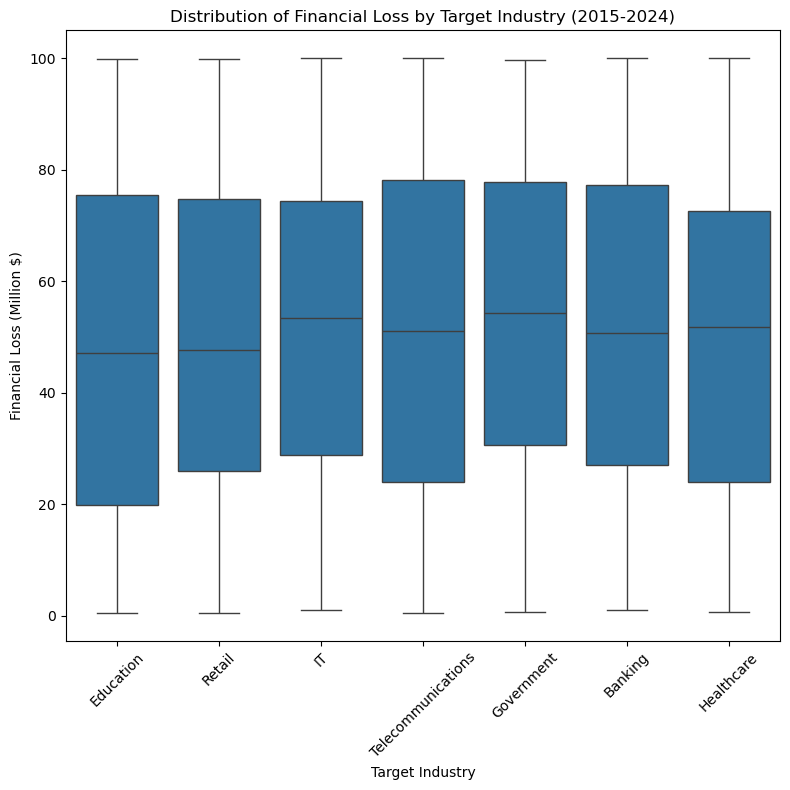

In [34]:
# Box Plot: Financial Loss by Target Industry ---
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='Target Industry', y='Financial Loss (in Million $)')
plt.title('Distribution of Financial Loss by Target Industry (2015-2024)')
plt.xlabel('Target Industry')
plt.ylabel('Financial Loss (Million $)')
plt.xticks(rotation=45)
plt.tight_layout()

In [36]:
# Create a pivot table for attack type vs. vulnerability type

pivot_attack_vuln = df.pivot_table(index='Attack Type', columns='Security Vulnerability Type', aggfunc='size', fill_value=0)

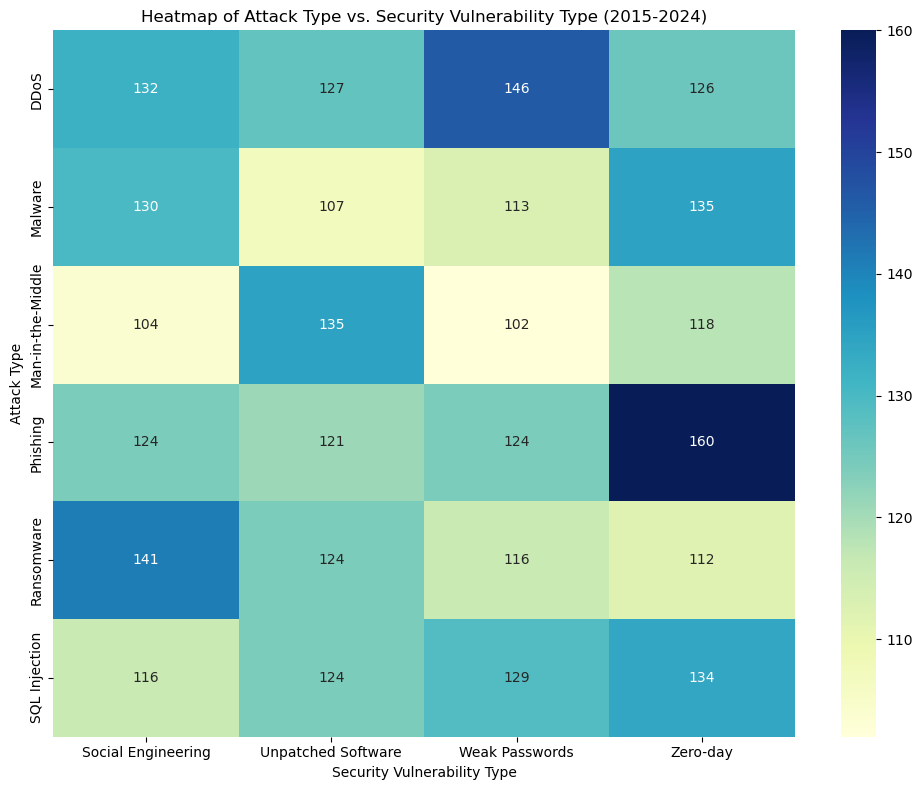

In [38]:
# Plot: Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_attack_vuln, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Attack Type vs. Security Vulnerability Type (2015-2024)')
plt.xlabel('Security Vulnerability Type')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

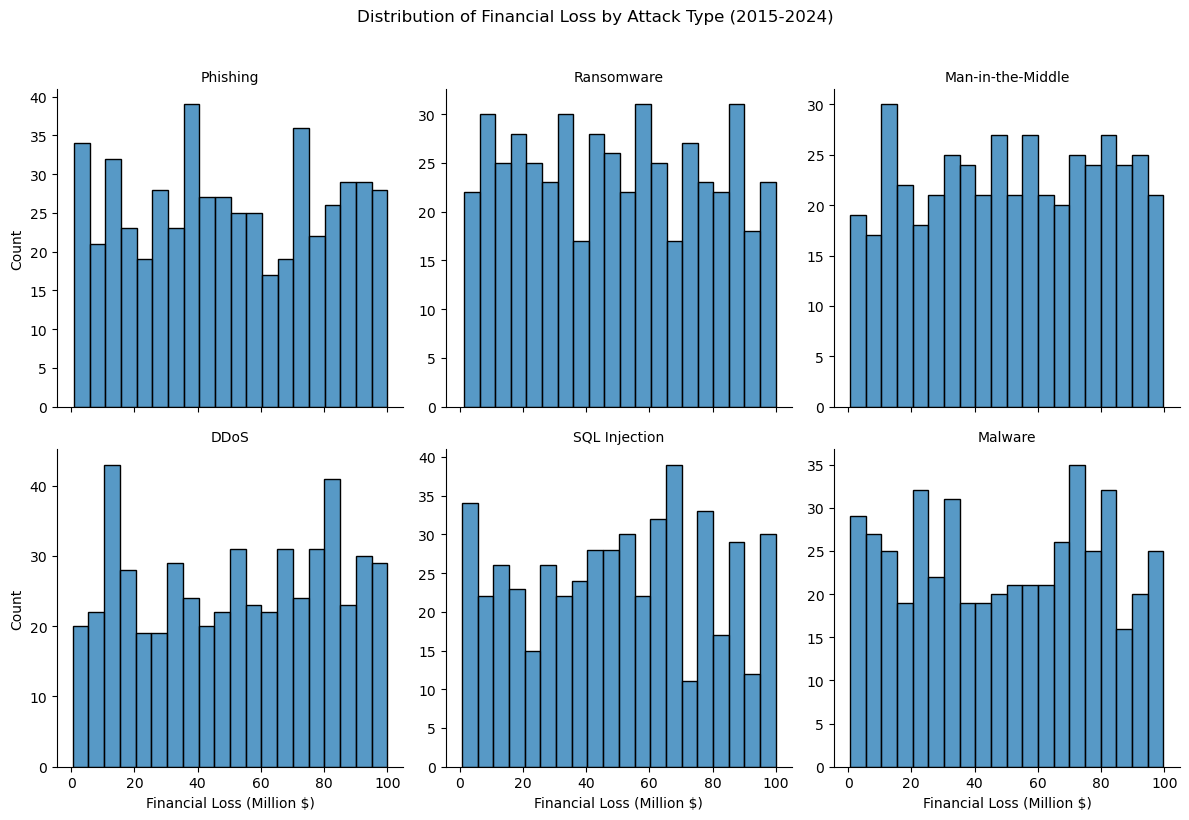

In [40]:
#  Facet Grid: Financial Loss by Year and Attack Type ---

g = sns.FacetGrid(df, col='Attack Type', col_wrap=3, height=4, sharey=False)
g.map(sns.histplot, 'Financial Loss (in Million $)', bins=20)
g.set_titles('{col_name}')
g.set_xlabels('Financial Loss (Million $)')
g.set_ylabels('Count')
plt.suptitle('Distribution of Financial Loss by Attack Type (2015-2024)', y=1.02)
plt.tight_layout()
plt.show()

In [41]:
loss_by_source_year = df.groupby(['Year', 'Attack Source'])['Financial Loss (in Million $)'].mean().unstack()

<Figure size 1200x800 with 0 Axes>

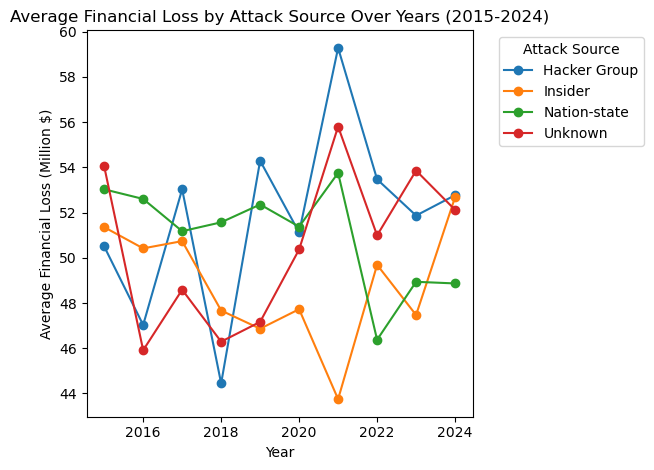

In [42]:
# Plot: Line Plot
plt.figure(figsize=(12, 8))
loss_by_source_year.plot(kind='line', marker='o')
plt.title('Average Financial Loss by Attack Source Over Years (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Average Financial Loss (Million $)')
plt.legend(title='Attack Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## The End